<a href="https://colab.research.google.com/github/Udipta24/Student-s-Performance-Prediction-Project/blob/main/Student_Performance_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**PROJECT 2**
#**Student Performance Prediction (Using Classification)**
---
##**Objective**: Predict whether a student will pass or fail based on features like study time, absences, and past performance.

---
**Step 1:** Import the required libraries
*   ***Pandas*** for loading the data from CSV file and storing it in the form of dataframe.
*   ***Numpy*** for any numerical tools requirement.
*   ***Matplotlib.pyplot*** and ***Seaborn*** for data visualization.
*   ***Scikit-Learn*** for Machine Learning model (training and testing), encoding Categorical data and accessing different evaluation metrics.
---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

---
**Step 2:** Load Dataset from CSV file `student-mat.csv` (from Github) and store it in the form of a DataFrame.
The values in the CSV file are separated by ; (semicolon) so we explicitly mention the separator as arguement `sep = ';'`

---

In [ ]:
url = 'https://raw.githubusercontent.com/amankharwal/Website-data/master/student-mat.csv'
df = pd.read_csv(url)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


---
**Step 3:** Explore and understand the dataset.
* Get the number of rows and columns in the form of a tuple through `df.shape` method.
* Check for `null` values and adopt methods to handle them if required. Get the total number of `null` values in each column through `df.isnull().sum()` method. Since the dataset does not have any `null` value in any column so skip the methods for handling those values.
* Get a quick summary of the key statistical metrics of each column through `df.describe()` method.
---

In [ ]:
print("SHAPE: ",df.shape)
print("NULL VALUES:")
print(df.isnull().sum())
df.describe()

SHAPE:  (395, 33)
NULL VALUES:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


---
**Step 4:** Create the target columns `pass_fail` on the basis of `G3` column. Value in `pass_fail` column is **1** for **Pass** and **0** for **Fail**. If value in `G3` column is **>= 10** then **Pass** else **Fail**.

---

In [ ]:
df['pass_fail'] = df['G3'].apply(lambda x: 1 if x >= 10 else 0)

---
**Step 5:** Encode all categorical data using **`LabelEncoder()`** available in **Scikit-Learn**. Filter out the columns having character or string data type values through `df.select_dtypes(include='object')` method and then select only the column names through `.columns` method to apply label encoding inplace on all the columns with categorical data.

---

In [ ]:
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

---
**Step 6:** Separate out the relevant and required features from the dataset and the target variable `pass_fail`. The selected features are:
* **G1:** 1st period grade
* **G2:** 2nd period grade
* **studytime:** hours studied per week
* **failures:** past class failures
* **absences:** number of school absences
* **schoolsup:** extra educational support
* **internet:** internet access at home
* **activities:** participation in extracurricular activities
* **goout:** frequency of going out with friends
* **Fedu:** father's education level
* **Medu:** mother's education level
---
`G3` is not considered as a feature as the target variable `pass_fail` is determined by the values of `G3`, so if taken as a feature it may lead to data leakage.

---

In [ ]:
selected_features = ['G1', 'G2', 'studytime', 'failures', 'absences', 'schoolsup', 'internet', 'activities', 'goout', 'Fedu', 'Medu']
X = df[selected_features]
y = df['pass_fail']

---
#**Step 7:** Data Visualization
---

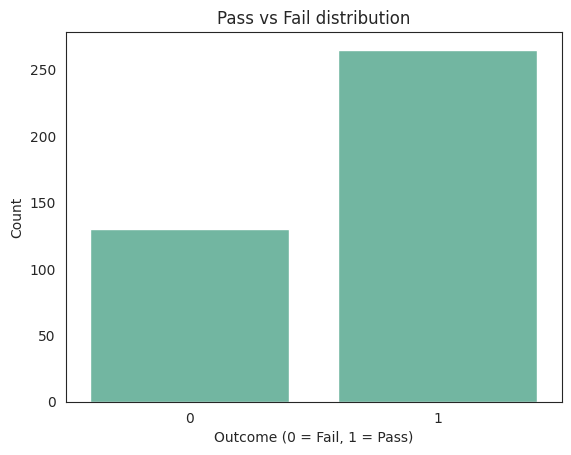

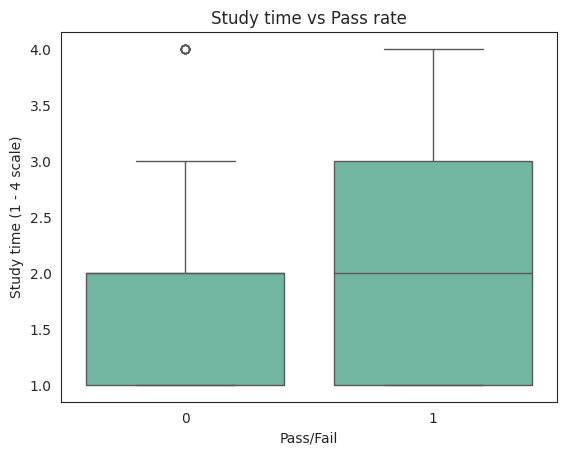

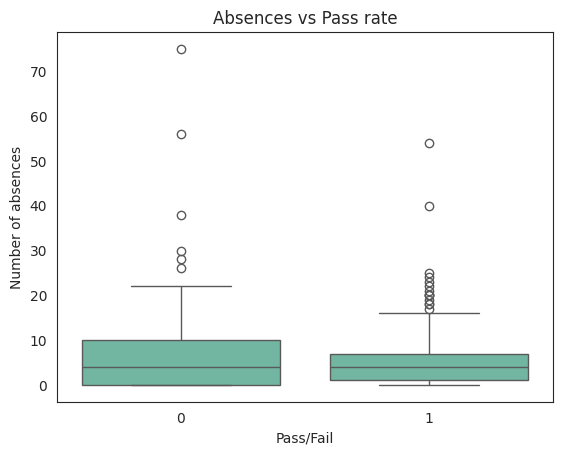

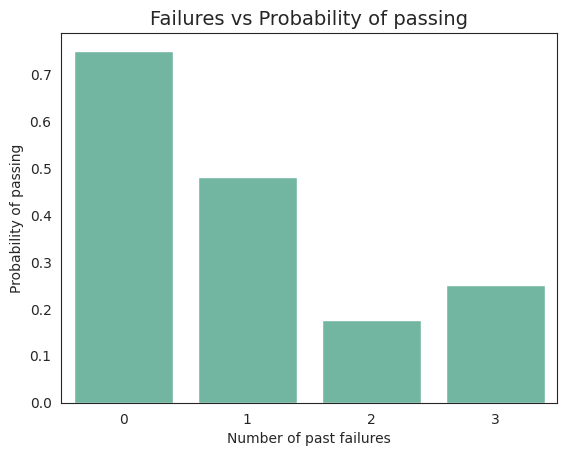

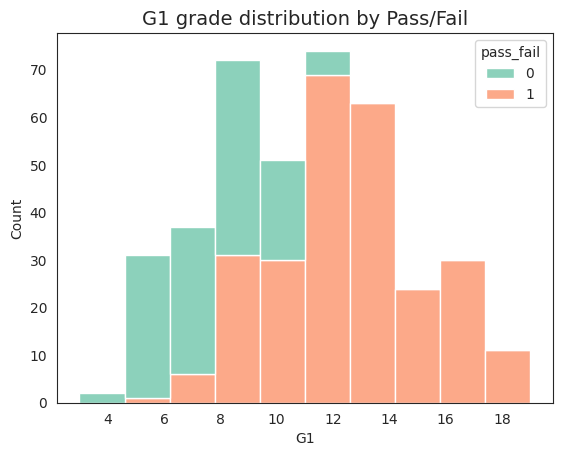

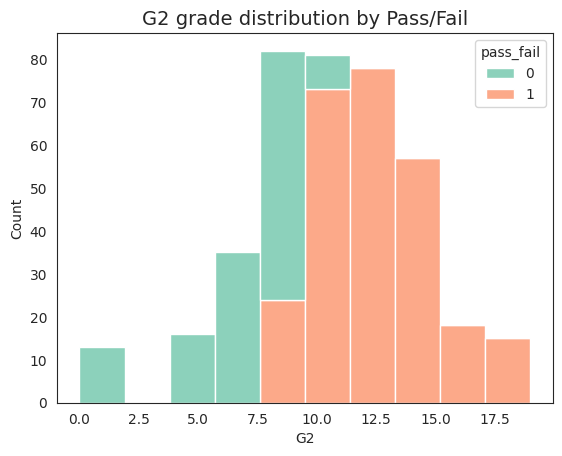

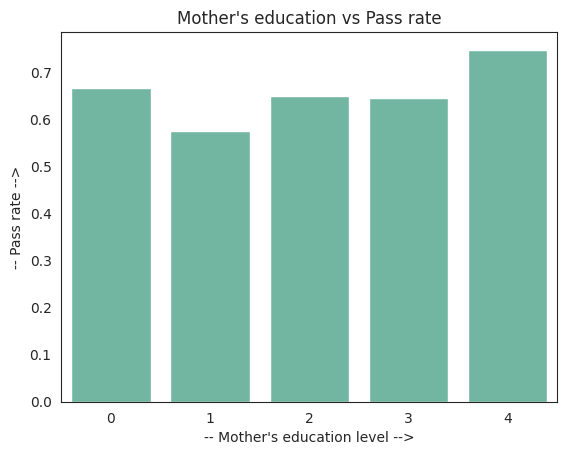

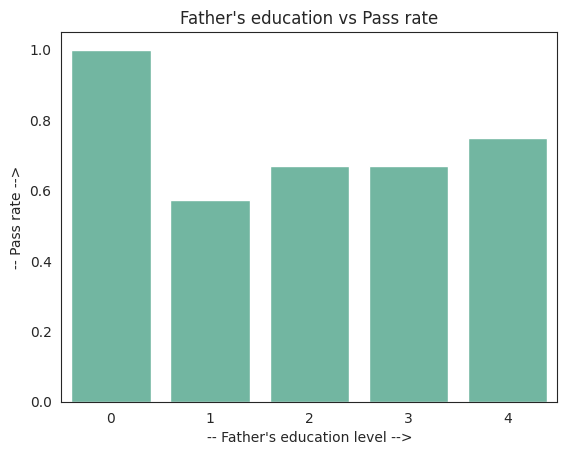

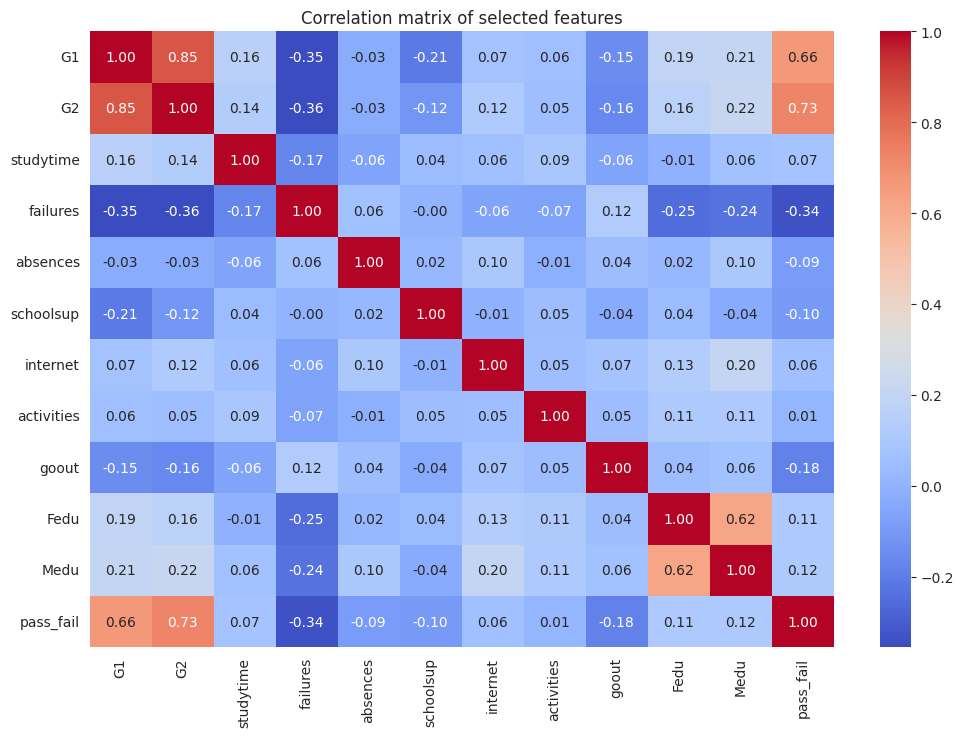

In [ ]:
sns.set_style('white')
sns.set_palette('Set2')
# PASS VS FAIL DISTRIBUTION
sns.countplot(x='pass_fail', data=df)
plt.title('Pass vs Fail distribution')
plt.xlabel("Outcome (0 = Fail, 1 = Pass)")
plt.ylabel("Count")
plt.show()
# STUDY TIME VS PASS RATE
sns.boxplot(x='pass_fail', y='studytime', data=df)
plt.title('Study time vs Pass rate')
plt.xlabel("Pass/Fail")
plt.ylabel("Study time (1 - 4 scale)")
plt.show()
# ABSENCES VS PASS RATE
sns.boxplot(x='pass_fail', y='absences', data=df)
plt.title('Absences vs Pass rate')
plt.xlabel("Pass/Fail")
plt.ylabel("Number of absences")
plt.show()
# FAILURES VS PROBABILITY OF PASSING
sns.barplot(x='failures', y='pass_fail', data=df, errorbar=None)
plt.title("Failures vs Probability of passing", fontsize=14)
plt.xlabel("Number of past failures")
plt.ylabel("Probability of passing")
plt.show()
# G1 DISTRIBUTION OF PASS/FAIL
sns.histplot(data=df, x="G1", hue="pass_fail", multiple="stack", bins=10)
plt.title("G1 grade distribution by Pass/Fail", fontsize=14)
plt.show()
# G2 DISTRIBUTION OF PASS/FAIL
sns.histplot(data=df, x="G2", hue="pass_fail", multiple="stack", bins=10)
plt.title("G2 grade distribution by Pass/Fail", fontsize=14)
plt.show()
# MOTHER'S EDUCATION VS PASS RATE
sns.barplot(x='Medu', y='pass_fail', data=df, errorbar=None)
plt.title("Mother's education vs Pass rate")
plt.xlabel("-- Mother's education level -->")
plt.ylabel("-- Pass rate -->")
plt.show()
# FATHER'S EDUCATION VS PASS RATE
sns.barplot(x='Fedu', y='pass_fail', data=df, errorbar=None)
plt.title("Father's education vs Pass rate")
plt.xlabel("-- Father's education level -->")
plt.ylabel("-- Pass rate -->")
plt.show()
# CORRELATION MATRIX OF SELECTED FEATURES
plt.figure(figsize=(12, 8))
sns.heatmap(df[selected_features+['pass_fail']].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation matrix of selected features')
plt.show()

---
**Step 8:** Split the selected features and the corresponding dataset into training and testing sets, namely, `X_train, X_test, y_train, y_test`. Training set is 80% of the actual dataset and testing set is 20% of the actual set. We can use the `train_test_split()` method provided by the Scikit-learn library to split the dataset. This method takes arguements `X` = dataframe containing the features, `y` = target variable, `test_size` = size of testing set, `random_states = 42` by convention.

---

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

---
**Step 9:** Use **`LogisticRegression`** model provided by the **Scikit-learn** library and store it in a variable named `model`. Train the `model` on the **training sets** using the `model.fit()` method. Then let the `model` make predictions on the **testing set**.

---

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

---
**Step 10:** Evaluate the model's performance based on evaluation metrics such as **`accuracy_score`**, **`precision_score`** and **`recall_score`**. Also plot the **`confusion_matrix`** to determine the correctness of the predicted results relative to the actual results.

---

Accuracy: 0.8987341772151899
Precision: 0.9583333333333334
Recall: 0.8846153846153846


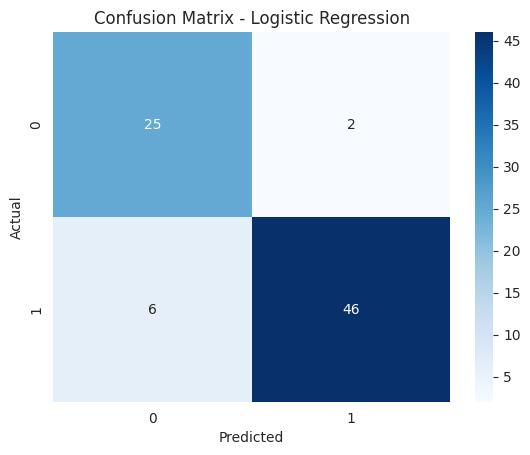

In [ ]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()